In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
raw = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dc-ds-060120/master/mod-4/week-3/Mod_4_Project/time-series/zillow_data.csv')

In [3]:
raw = raw.drop('RegionID', axis=1)

In [4]:
raw = raw.drop('SizeRank', axis=1)

In [5]:
raw.head()

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.0,236900.0,236700.0,235400.0,233300.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,210400.0,212200.0,212200.0,210700.0,208300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,498100.0,500900.0,503100.0,504600.0,505500.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [6]:
melted = pd.melt(raw, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
melted = melted.dropna(subset=['value'])
melted.head()

,RegionName,City,State,Metro,CountyName,time,value
0,60657,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0


In [7]:
melted.groupby('time').aggregate({'value':'mean'})

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312
...,...
2017-12-01,281095.320247
2018-01-01,282657.060382
2018-02-01,284368.688447


In [8]:
melted['year'] = melted.time.dt.year
melted

,RegionName,City,State,Metro,CountyName,time,value,year
0,60657,Chicago,IL,Chicago,Cook,1996-04-01,334200.0,1996
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0,1996
2,77494,Katy,TX,Houston,Harris,1996-04-01,210400.0,1996
3,60614,Chicago,IL,Chicago,Cook,1996-04-01,498100.0,1996
4,79936,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0,1996
...,...,...,...,...,...,...,...,...
3901590,1338,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.0,2018
3901591,3293,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.0,2018
3901592,40404,Berea,KY,Richmond,Madison,2018-04-01,133400.0,2018
3901593,81225,Mount Crested Butte,CO,NaN,Gunnison,2018-04-01,664400.0,2018


In [9]:
melted['year'] = melted.time.dt.year


In [10]:
zip_by_year = melted.groupby(['RegionName', 'year']).max()
zip_by_year

City State        Metro         CountyName       time  \
RegionName year                                                               
1001       1996     Agawam    MA  Springfield            Hampden 1996-12-01   
           1997     Agawam    MA  Springfield            Hampden 1997-12-01   
           1998     Agawam    MA  Springfield            Hampden 1998-12-01   
           1999     Agawam    MA  Springfield            Hampden 1999-12-01   
           2000     Agawam    MA  Springfield            Hampden 2000-12-01   
...                    ...   ...          ...                ...        ...   
99901      2014  Ketchikan    AK    Ketchikan  Ketchikan Gateway 2014-12-01   
           2015  Ketchikan    AK    Ketchikan  Ketchikan Gateway 2015-12-01   
           2016  Ketchikan    AK    Ketchikan  Ketchikan Gateway 2016-12-01   
           2017  Ketchikan    AK    Ketchikan  Ketchikan Gateway 2017-12-01   
           2018  Ketchikan    AK    Ketchikan  Ketchikan Gateway 2018-04-01   

                    value  
RegionName year            
1001       1996  113100.0  
           1997  114800.0  
           1998  117500.0  
           1999  122600.0  
           2000  129400.0  
...                   ...  
99901      2014  267100.0  
           2015  278600.0  
           2016  284100.0  
           2017  291900.0  
           2018  305100.0  

[325560 rows x 6 columns]

In [11]:
dir(pd.describe)

AttributeError: module 'pandas' has no attribute 'describe'

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
melted.groupby(['RegionName']).value.max().describe()

count      14723.00000
mean      305870.27100
std       387052.96398
min        22200.00000
25%       138200.00000
50%       212900.00000
75%       353300.00000
max     19314900.00000
Name: value, dtype: float64

In [13]:
raw.head()

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,334200.00000,335400.00000,336500.00000,337600.00000,338500.00000,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.00000,236900.00000,236700.00000,235400.00000,233300.00000,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,210400.00000,212200.00000,212200.00000,210700.00000,208300.00000,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,498100.00000,500900.00000,503100.00000,504600.00000,505500.00000,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,77300.00000,77300.00000,77300.00000,77300.00000,77400.00000,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [14]:
melted

,RegionName,City,State,Metro,CountyName,time,value,year
0,60657,Chicago,IL,Chicago,Cook,1996-04-01,334200.00000,1996
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.00000,1996
2,77494,Katy,TX,Houston,Harris,1996-04-01,210400.00000,1996
3,60614,Chicago,IL,Chicago,Cook,1996-04-01,498100.00000,1996
4,79936,El Paso,TX,El Paso,El Paso,1996-04-01,77300.00000,1996
...,...,...,...,...,...,...,...,...
3901590,1338,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.00000,2018
3901591,3293,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.00000,2018
3901592,40404,Berea,KY,Richmond,Madison,2018-04-01,133400.00000,2018
3901593,81225,Mount Crested Butte,CO,NaN,Gunnison,2018-04-01,664400.00000,2018


In [15]:
# Make a list of all zipcodes appearing at least 60 times (observations are monthly so this translates to five years worth of data)
melted.RegionName.value_counts() \
    [melted.RegionName.value_counts() > 60] \
    .index.to_list()

[28658,
 94957,
 80610,
 49885,
 60120,
 19148,
 15042,
 97003,
 94954,
 76513,
 74464,
 56031,
 19149,
 97004,
 12992,
 74471,
 72416,
 60126,
 56024,
 10950,
 15044,
 97005,
 27343,
 29388,
 19147,
 8902,
 97002,
 29384,
 97006,
 19136,
 60119,
 56017,
 2763,
 17090,
 23233,
 78575,
 94951,
 10956,
 2760,
 27332,
 23234,
 78574,
 17102,
 33496,
 23235,
 19137,
 70373,
 74467,
 19150,
 29385,
 94952,
 70372,
 60123,
 19151,
 15045,
 60124,
 60035,
 29365,
 27312,
 66205,
 80538,
 15035,
 23223,
 19125,
 31411,
 27313,
 66204,
 2746,
 6840,
 60070,
 19124,
 80540,
 66203,
 15037,
 2747,
 19123,
 17074,
 60071,
 66202,
 92823,
 84627,
 10940,
 31410,
 23222,
 56026,
 55972,
 15046,
 8901,
 97007,
 80615,
 78566,
 19145,
 19126,
 23220,
 31408,
 33455,
 53925,
 66207,
 8889,
 76442,
 80536,
 19127,
 17078,
 23221,
 29360,
 60067,
 66206,
 80537,
 2748,
 15034,
 39641,
 33498,
 78572,
 60104,
 27355,
 25306,
 10963,
 15057,
 60107,
 33478,
 97018,
 76528,
 21215,
 29403,
 10960,
 33477,
 

In [16]:
# MVP: Fit and Predict for One Zipcode, show accuracy over time
one_zip = melted[melted['RegionName'] == 20007]

one_zip = one_zip[['time', 'value']]
one_zip = one_zip.set_index('time')
one_zip

,value
time,
1996-04-01,358100.00000
1996-05-01,356000.00000
1996-06-01,353900.00000
1996-07-01,351700.00000
1996-08-01,349600.00000
...,...
2017-12-01,1296500.00000
2018-01-01,1293000.00000
2018-02-01,1291200.00000


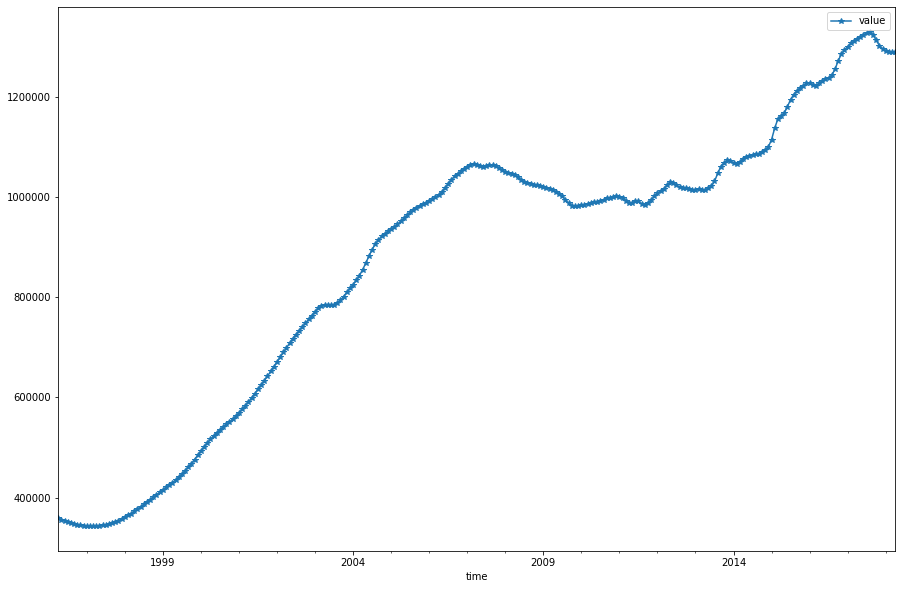

In [17]:
# Visualize the data over time

fig, ax = plt.subplots(figsize=(15,10))
one_zip.plot(marker='*', ax=ax)


In [18]:
# Checking the index is datetime format

type(one_zip.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [19]:
# Checking for missing values

one_zip.value.isna().sum()

0

<Figure size 432x288 with 0 Axes>

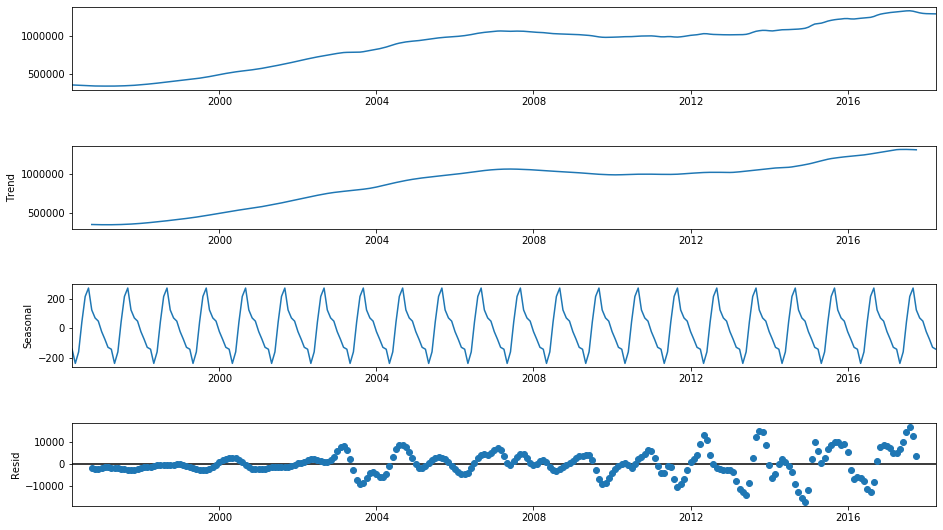

In [20]:
# Checking the decomposed seasonal trends:

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(one_zip)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [21]:
# Test Stationarity - Appears to not be stationary without any differencing

from statsmodels.tsa.stattools import adfuller

adfuller(one_zip)

(-2.563886562867809,
 0.10069322265751685,
 15,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 4290.592655898536)

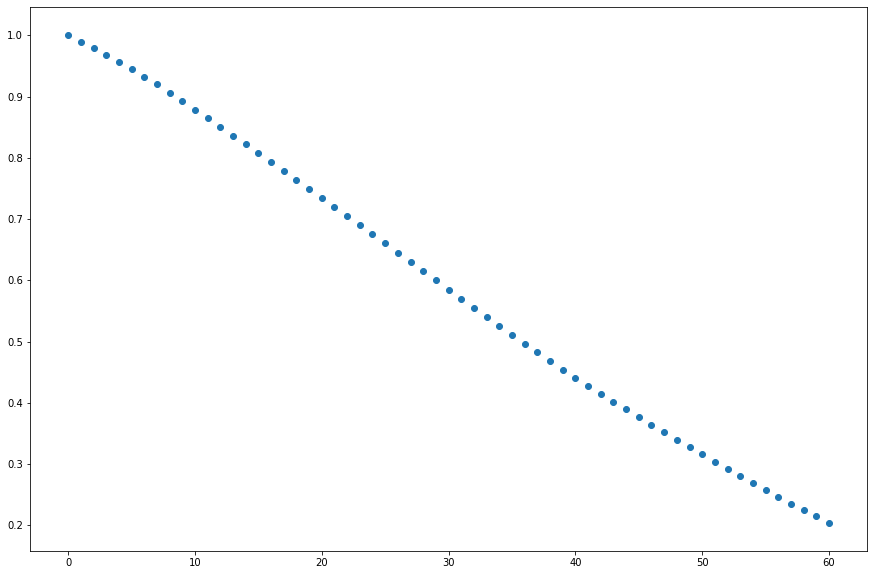

In [22]:
# Checking the autocorrelation/partial autocorrelation:
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(15,10))
fig = plt.scatter(x = range(0,61), y=acf(one_zip, nlags=60, fft=True).ravel())


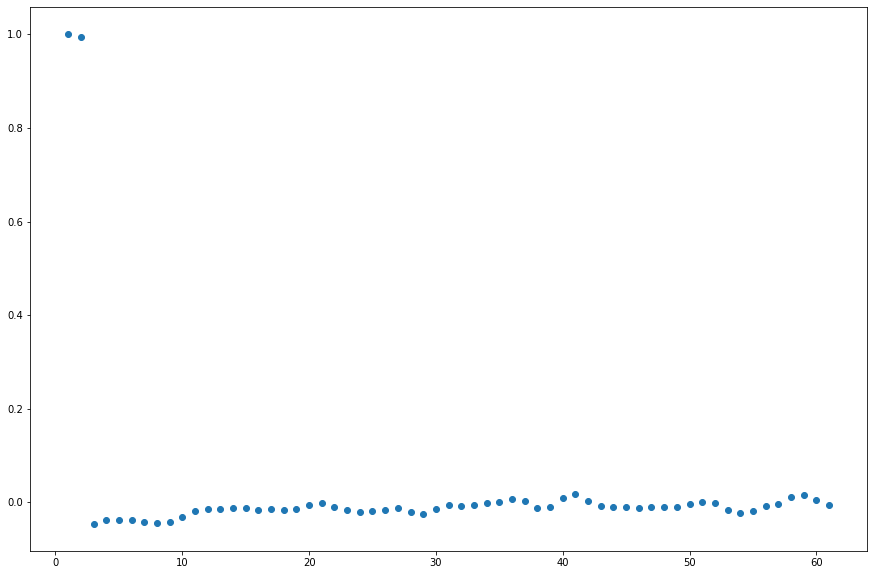

In [23]:
fig = plt.figure(figsize=(15,10))
fig = plt.scatter(x = range(1,62), y=pacf(one_zip, nlags=60).ravel())

In [2]:
# Let's try a quick ARIMA model:

from statsmodels.tsa.arima_model import ARIMA



In [25]:
melted[melted.RegionName == 1001].head()

,RegionName,City,State,Metro,CountyName,time,value,year
5850,1001,Agawam,MA,Springfield,Hampden,1996-04-01,113100.00000,1996
20573,1001,Agawam,MA,Springfield,Hampden,1996-05-01,112800.00000,1996
35296,1001,Agawam,MA,Springfield,Hampden,1996-06-01,112600.00000,1996
50019,1001,Agawam,MA,Springfield,Hampden,1996-07-01,112300.00000,1996
64742,1001,Agawam,MA,Springfield,Hampden,1996-08-01,112100.00000,1996


In [26]:
melted.value.isna().sum()

0

In [27]:
# zip_df = melted.pivot_table(index='time', columns='RegionName', values='value')
# zip_df

RegionName,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,...,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,113100.00000,161000.00000,103100.00000,133400.00000,117500.00000,115800.00000,87000.00000,88500.00000,97200.00000,91200.00000,...,122700.00000,112200.00000,112500.00000,89400.00000,101900.00000,103000.00000,109200.00000,166800.00000,155500.00000,117100.00000
1996-05-01,112800.00000,160100.00000,103400.00000,132700.00000,117300.00000,115700.00000,87000.00000,88500.00000,97100.00000,91100.00000,...,124200.00000,112400.00000,113100.00000,89800.00000,102900.00000,103900.00000,109600.00000,166200.00000,154900.00000,117200.00000
1996-06-01,112600.00000,159300.00000,103600.00000,132000.00000,117100.00000,115500.00000,87100.00000,88400.00000,97000.00000,91000.00000,...,125700.00000,112600.00000,113800.00000,90200.00000,103800.00000,104700.00000,110000.00000,165400.00000,154200.00000,117300.00000
1996-07-01,112300.00000,158600.00000,103800.00000,131400.00000,117000.00000,115300.00000,87200.00000,88300.00000,96800.00000,90800.00000,...,127200.00000,112800.00000,114400.00000,90600.00000,104700.00000,105500.00000,110400.00000,164400.00000,153500.00000,117400.00000
1996-08-01,112100.00000,158000.00000,103900.00000,130800.00000,116800.00000,115100.00000,87400.00000,88200.00000,96600.00000,90700.00000,...,128600.00000,113000.00000,115100.00000,91000.00000,105400.00000,106200.00000,110800.00000,163500.00000,152800.00000,117500.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,221700.00000,342000.00000,213300.00000,268100.00000,205400.00000,243800.00000,151400.00000,173300.00000,187400.00000,201200.00000,...,258800.00000,219100.00000,250200.00000,206700.00000,261100.00000,262800.00000,273500.00000,402300.00000,396200.00000,291900.00000
2018-01-01,221700.00000,344500.00000,215600.00000,268100.00000,204500.00000,244600.00000,150100.00000,174600.00000,188100.00000,204600.00000,...,259400.00000,218900.00000,250600.00000,206100.00000,261300.00000,262800.00000,273800.00000,406200.00000,397500.00000,294200.00000
2018-02-01,221700.00000,347400.00000,217900.00000,268800.00000,206800.00000,246700.00000,150100.00000,175900.00000,189000.00000,211200.00000,...,259900.00000,218300.00000,250100.00000,205600.00000,261400.00000,262300.00000,273800.00000,409800.00000,398900.00000,297500.00000


In [3]:
zip_df = pd.read_pickle('../data/wip/zip_df.pkl')
zip_df

,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,...,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,113100.0,161000.0,103100.0,133400.0,117500.0,115800.0,87000.0,88500.0,97200.0,91200.0,...,122700.0,112200.0,112500.0,89400.0,101900.0,103000.0,109200.0,166800.0,155500.0,117100.0
1996-05-01,112800.0,160100.0,103400.0,132700.0,117300.0,115700.0,87000.0,88500.0,97100.0,91100.0,...,124200.0,112400.0,113100.0,89800.0,102900.0,103900.0,109600.0,166200.0,154900.0,117200.0
1996-06-01,112600.0,159300.0,103600.0,132000.0,117100.0,115500.0,87100.0,88400.0,97000.0,91000.0,...,125700.0,112600.0,113800.0,90200.0,103800.0,104700.0,110000.0,165400.0,154200.0,117300.0
1996-07-01,112300.0,158600.0,103800.0,131400.0,117000.0,115300.0,87200.0,88300.0,96800.0,90800.0,...,127200.0,112800.0,114400.0,90600.0,104700.0,105500.0,110400.0,164400.0,153500.0,117400.0
1996-08-01,112100.0,158000.0,103900.0,130800.0,116800.0,115100.0,87400.0,88200.0,96600.0,90700.0,...,128600.0,113000.0,115100.0,91000.0,105400.0,106200.0,110800.0,163500.0,152800.0,117500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,221700.0,342000.0,213300.0,268100.0,205400.0,243800.0,151400.0,173300.0,187400.0,201200.0,...,258800.0,219100.0,250200.0,206700.0,261100.0,262800.0,273500.0,402300.0,396200.0,291900.0
2018-01-01,221700.0,344500.0,215600.0,268100.0,204500.0,244600.0,150100.0,174600.0,188100.0,204600.0,...,259400.0,218900.0,250600.0,206100.0,261300.0,262800.0,273800.0,406200.0,397500.0,294200.0
2018-02-01,221700.0,347400.0,217900.0,268800.0,206800.0,246700.0,150100.0,175900.0,189000.0,211200.0,...,259900.0,218300.0,250100.0,205600.0,261400.0,262300.0,273800.0,409800.0,398900.0,297500.0


In [4]:
# How many rows have x number of missing values (number of rows is the value column of output, number of missing is index)
missing_count = zip_df.isna().sum().value_counts().sort_index()
missing_count

0      13684
15         1
21         2
87       118
93        31
99        21
105       52
107       13
111       78
117       56
123       27
129       20
135        7
141        6
147        9
153       11
159        7
165        1
167      230
171       41
177       33
183       24
189       27
195       18
201       55
207       42
213       53
219       56
dtype: int64

In [5]:
# How many rows are missing values? (sum of counts in missing_count minus the number of entries with zero missing: 13684)
missing_count.sum() - 13684

1039

In [6]:
# About Seven Percent of zipcodes are missing 15 or more entries
1039/len(zip_df.columns)

0.07056985668681655

In [7]:
zip_df.index.max()

Timestamp('2018-04-01 00:00:00')

In [8]:
# Are there any missing values recently-- last six months-- (no), if so discard those
zip_df.iloc[zip_df.index > '2017-10-01'].isna().sum().value_counts()

0    14723
dtype: int64

## Project Plan
1) Shape data by zipcode(columns), indexed by date

    - Plan to deal with missing values, how many months missing is okay? Imputation potentially?

2) Test models on 1 zipcode, outputting best model (accuracy measure?) and best differencing params

    - Difference/decompose each column before fitting models, use adfuller as stationarity test
    - Use a 75-25 Train/Test Split

3) Create decision function based off ROI adjusted for loss scenarios/conf int.

4) Test models on 10 zipcodes, outputting best model (accuracy measure?), best differencing params for each zipcode, as well as largest predicted ROI

5) Test models on all zipcodes as in step 4

6) Modular add-ons (rent offset, performance over time, etc.)

In [9]:
# Convert columns to string for easier index access, move this step higher up the workflow
zip_df.columns = [str(x) for x in zip_df.columns]
zip_df.columns

Index(['1001', '1002', '1005', '1007', '1008', '1010', '1011', '1013', '1020',
       '1026',
       ...
       '99654', '99664', '99669', '99701', '99705', '99709', '99712', '99801',
       '99835', '99901'],
      dtype='object', length=14723)

In [10]:
zip_df.to_pickle('../data/wip/zip_df.pkl')

In [11]:
# Notes from checkin:

# Results by client class, who can take advantage of x? Do you need minimum amount of capital etc.?



In [12]:
zip_df['1001']

time
1996-04-01    113100.0
1996-05-01    112800.0
1996-06-01    112600.0
1996-07-01    112300.0
1996-08-01    112100.0
                ...   
2017-12-01    221700.0
2018-01-01    221700.0
2018-02-01    221700.0
2018-03-01    222700.0
2018-04-01    223600.0
Name: 1001, Length: 265, dtype: float64

In [15]:
from statsmodels.tsa.stattools import adfuller
adfuller(zip_df['1001'])

(-1.7467926412738275,
 0.40717889973199395,
 13,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3563.9412458378274)

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

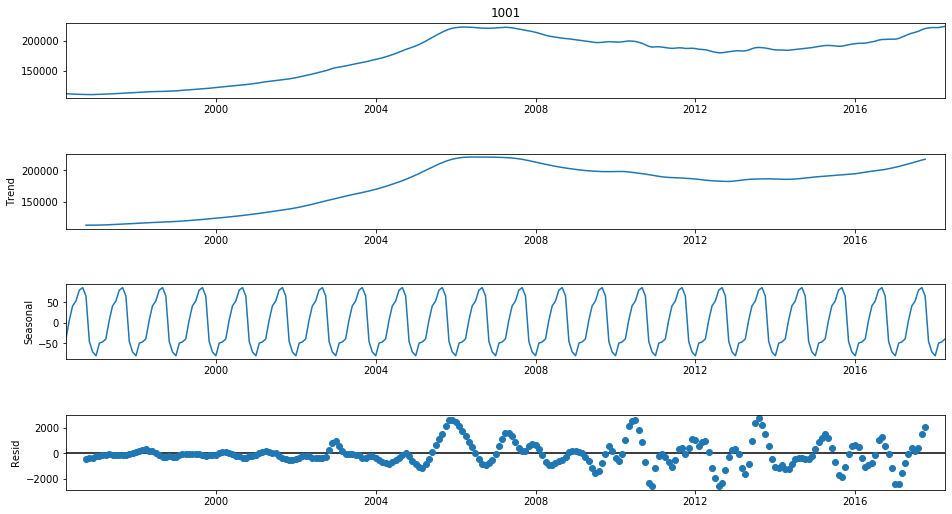

In [17]:
decomposition = seasonal_decompose(zip_df['1001'])
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

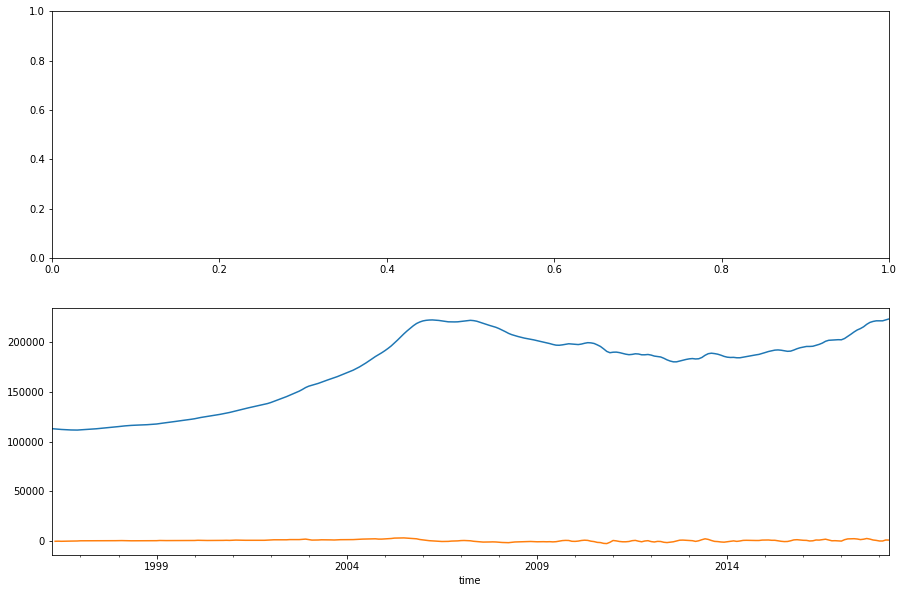

In [18]:
one_train = zip_df['1001']

fig, axs = plt.subplots(2, figsize=(15,10))
axs[0] = one_train.plot()
axs[1] = one_train.diff().plot()
plt.show()

In [19]:
# Stationarity test with no lag
adfuller(one_train)

(-1.7467926412738275,
 0.40717889973199395,
 13,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3563.9412458378274)

In [20]:
# Stationarity with 1 lag
adfuller(one_train.diff()[1:])

(-1.9453525470037503,
 0.3110356104138362,
 12,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3552.048382789642)

In [21]:
# Stationarity with 2 lags
adfuller(one_train.diff()[1:].diff()[1:])

(-6.627156477050341,
 5.8372030590914575e-09,
 11,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3540.671779819917)

In [22]:
one_train.diff()[1:].diff()[1:]

time
1996-06-01     100.0
1996-07-01    -100.0
1996-08-01     100.0
1996-09-01       0.0
1996-10-01     100.0
               ...  
2017-12-01    -400.0
2018-01-01    -600.0
2018-02-01       0.0
2018-03-01    1000.0
2018-04-01    -100.0
Name: 1001, Length: 263, dtype: float64

In [23]:
train_ind = one_train.index[0:round(len(one_train)*.75)]
test_ind = [i for i in one_train.index if not i in train_ind]
test_ind
one_test = one_train[test_ind]
one_test

time
2012-11-01    182100.0
2012-12-01    182800.0
2013-01-01    183400.0
2013-02-01    183700.0
2013-03-01    183300.0
                ...   
2017-12-01    221700.0
2018-01-01    221700.0
2018-02-01    221700.0
2018-03-01    222700.0
2018-04-01    223600.0
Name: 1001, Length: 66, dtype: float64

In [24]:
one_train = one_train[train_ind]
one_train

time
1996-04-01    113100.0
1996-05-01    112800.0
1996-06-01    112600.0
1996-07-01    112300.0
1996-08-01    112100.0
                ...   
2012-06-01    182400.0
2012-07-01    181200.0
2012-08-01    180400.0
2012-09-01    180400.0
2012-10-01    181200.0
Name: 1001, Length: 199, dtype: float64

In [25]:
one_train.diff()[1:].diff()[1:]

time
1996-06-01    100.0
1996-07-01   -100.0
1996-08-01    100.0
1996-09-01      0.0
1996-10-01    100.0
              ...  
2012-06-01   -300.0
2012-07-01    400.0
2012-08-01    400.0
2012-09-01    800.0
2012-10-01    800.0
Name: 1001, Length: 197, dtype: float64

In [26]:
one_train[one_train.index == '2018-04-01']

Series([], Name: 1001, dtype: float64)

In [27]:
zip_df

,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,...,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,113100.0,161000.0,103100.0,133400.0,117500.0,115800.0,87000.0,88500.0,97200.0,91200.0,...,122700.0,112200.0,112500.0,89400.0,101900.0,103000.0,109200.0,166800.0,155500.0,117100.0
1996-05-01,112800.0,160100.0,103400.0,132700.0,117300.0,115700.0,87000.0,88500.0,97100.0,91100.0,...,124200.0,112400.0,113100.0,89800.0,102900.0,103900.0,109600.0,166200.0,154900.0,117200.0
1996-06-01,112600.0,159300.0,103600.0,132000.0,117100.0,115500.0,87100.0,88400.0,97000.0,91000.0,...,125700.0,112600.0,113800.0,90200.0,103800.0,104700.0,110000.0,165400.0,154200.0,117300.0
1996-07-01,112300.0,158600.0,103800.0,131400.0,117000.0,115300.0,87200.0,88300.0,96800.0,90800.0,...,127200.0,112800.0,114400.0,90600.0,104700.0,105500.0,110400.0,164400.0,153500.0,117400.0
1996-08-01,112100.0,158000.0,103900.0,130800.0,116800.0,115100.0,87400.0,88200.0,96600.0,90700.0,...,128600.0,113000.0,115100.0,91000.0,105400.0,106200.0,110800.0,163500.0,152800.0,117500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,221700.0,342000.0,213300.0,268100.0,205400.0,243800.0,151400.0,173300.0,187400.0,201200.0,...,258800.0,219100.0,250200.0,206700.0,261100.0,262800.0,273500.0,402300.0,396200.0,291900.0
2018-01-01,221700.0,344500.0,215600.0,268100.0,204500.0,244600.0,150100.0,174600.0,188100.0,204600.0,...,259400.0,218900.0,250600.0,206100.0,261300.0,262800.0,273800.0,406200.0,397500.0,294200.0
2018-02-01,221700.0,347400.0,217900.0,268800.0,206800.0,246700.0,150100.0,175900.0,189000.0,211200.0,...,259900.0,218300.0,250100.0,205600.0,261400.0,262300.0,273800.0,409800.0,398900.0,297500.0


In [28]:
# ROI from beginning to end of table

(zip_df['1001'][-1]/zip_df['1001'][0]) - 1

0.9770114942528736

Lag: 14
Coefficients: [-4.76619252  0.60141155 -0.38384097  0.0622626  -0.00643859 -0.21530151
  0.26172035 -0.16637076  0.08781042 -0.31303174  0.26210386  0.03789678
 -0.29948158 -0.1878581   0.250815  ]
72
263
predicted=184694.000000, expected=184000.000000
Test RMSE: 45681.431
predicted=184378.000000, expected=182400.000000
Test RMSE: 45681.431
predicted=183827.000000, expected=181200.000000
Test RMSE: 45681.431
predicted=182352.000000, expected=180400.000000
Test RMSE: 45681.431
predicted=181068.000000, expected=180400.000000
Test RMSE: 45681.431
predicted=180890.000000, expected=181200.000000
Test RMSE: 45681.431
predicted=180796.000000, expected=182100.000000
Test RMSE: 45681.431
predicted=179758.000000, expected=182800.000000
Test RMSE: 45681.431
predicted=178851.000000, expected=183400.000000
Test RMSE: 45681.431
predicted=178553.000000, expected=183700.000000
Test RMSE: 45681.431
predicted=178000.000000, expected=183300.000000
Test RMSE: 45681.431
predicted=177190.000000, exp

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


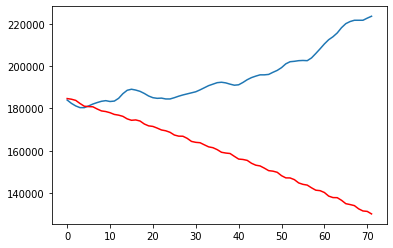

In [77]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

# split dataset using second order differenced data
diff_1 = zip_df['1001'].diff()[1:]
diff_2 = diff_1.diff()[1:]
test_undiff = zip_df['1001'][-72:].values
X = zip_df['1001'].diff()[1:].diff()[1:].values
train, test = X[0:len(X)-72], X[len(X)-72:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions on the differenced data
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
print(len(predictions))

print(X.size)
np.r_[train, predictions].size
#convert predictions back to values

predicted_values = transform_diff2s(zip_df['1001'][0], diff_1[0], np.r_[train, predictions])

model_predictions = predicted_values[-72:]
# print(X[-72], zip_df['1001'][[-74, -72]])
for i in range(len(model_predictions)):
    print('predicted=%f, expected=%f' % (model_predictions[i], test_undiff[i]))
    rmse = sqrt(mean_squared_error(test_undiff, model_predictions))
    print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test_undiff)
plt.plot(model_predictions, color='red')

plt.show()

In [78]:

df = pd.DataFrame({'A': zip_df['1001'].values})
df['diff1'] = df['A'].diff()
df['diff2'] = df['diff1'].diff()

def transform_diff2s(x_start, diff_start, pred_diff2s):
    """Transform second order differenced predictions to the values of the original formatted data
    
    Params:
        x_start (numeric) the first value in the original series x
        diff_start (numeric) the first non-null value in the 1st order difference, ie. x.diff().iloc[1]
        pred_diff2s (series-like object) the predicted second order differenced values from some model
        
    Returns:
        (series) undifferenced values in original format of x"""
    import numpy as np
    
    x = x_start

    x2 = diff_start
    
    x_diff2 = pred_diff2s
    x_diff = np.r_[x2, x_diff2].cumsum().astype(int)
    transformed_preds = np.r_[x, x_diff].cumsum().astype(int)
    
    return transformed_preds

# x, x_diff = df['A'].iloc[0], df['B'].iloc[1:]
# df['D'] = np.r_[x, x_diff].cumsum().astype(int)
# x2, x_diff2 = df['B'].iloc[1], df['C'].iloc[2:]
# x_diff_test = np.r_[x2, x_diff2].cumsum().astype(int)
# x_diff_test == x_diff
# df['E'] = np.r_[x, np.r_[x2, x_diff2].cumsum().astype(int)].astype(int)
# print(x.size, x_diff.size, x_diff2.size, x2.size, len(df['A']))
transform_diff2s(df['A'][0], df['diff1'][1], df['diff2'][2:])


array([113100, 112800, 112600, 112300, 112100, 111900, 111800, 111700,
       111700, 111900, 112100, 112300, 112500, 112800, 113000, 113300,
       113600, 113900, 114200, 114500, 114800, 115200, 115600, 115900,
       116200, 116400, 116600, 116700, 116800, 116900, 117100, 117300,
       117500, 117800, 118300, 118700, 119100, 119500, 120000, 120400,
       120900, 121300, 121700, 122100, 122600, 123100, 123800, 124400,
       124900, 125400, 125900, 126400, 127000, 127500, 128100, 128800,
       129400, 130200, 131100, 131900, 132700, 133400, 134100, 134800,
       135400, 136100, 136800, 137500, 138400, 139400, 140600, 141800,
       143000, 144200, 145400, 146800, 148200, 149500, 150900, 152600,
       154500, 155900, 156800, 157700, 158700, 159900, 161100, 162200,
       163300, 164300, 165500, 166800, 168100, 169300, 170600, 172000,
       173600, 175300, 177200, 179200, 181300, 183500, 185700, 187600,
       189500, 191600, 193900, 196400, 199300, 202300, 205500, 208600,
      

In [80]:
# Let's Try a Naive Persistence Model as a baseline:

# Create lagged dataset
values = pd.DataFrame(zip_df['1001'].values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']
df

,t,t+1
0,NaN,113100.0
1,113100.0,112800.0
2,112800.0,112600.0
3,112600.0,112300.0
4,112300.0,112100.0
...,...,...
260,221100.0,221700.0
261,221700.0,221700.0
262,221700.0,221700.0
263,221700.0,222700.0


In [83]:
# split into train and test sets

X = df.values
train_size = int(len(X) * 0.75)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]



In [88]:
# persistence model

predictions = [x for x in test_X]


from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = zip_df['1001']
# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.75)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals.describe()

Test RMSE: 1047.100


,0
count,67.000000
mean,644.776119
std,831.261105
min,-1200.000000
25%,100.000000
50%,600.000000
75%,1000.000000
max,2500.000000


In [97]:
# Test Harness - We will be making predictions based off of a five year holding period, lets withhold 60 months as a validation set
split_point = len(zip_df['1001']) - 60
train, test = zip_df['1001'][:split_point], zip_df['1001'][split_point:]

print(len(train), len(test))


205 60


In [98]:
# Performance Measure-- We will be using RMSE initially

def RMSE(y_true, y_pred):
    """Simple wrapper function on mean_squared_error to return RMSE
    
    Params:
        predictions (series or array like object), the predicted values from model
        test_data (series or array like object), the true target values
        
    Returns:
        RMSE (list) list of accumulated RMSE values for each observation in consecutive time order
        i.e. the first return value will be just the error of first prediction, second the sqrt of mean squared error for first 2 predictions, etc."""
    # Import necessary function
    from sklearn.metrics import mean_squared_error
    
    # Ensure predictions and test_data are same size
    if len(y_pred) != len(y_true):
        return "Test data and predictions must have equal length"
    
    else:
        rmse = [mean_squared_error(y_true[:i+1], y_pred[:i+1], squared=False) for i, _ in enumerate(y_pred)]
        return rmse
    
test_a = [i for i in range(11)]
test_preds = [i + 1 if i < 6 else i + 5 for i in test_a]

RMSE(test_a, test_preds)
    

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.104417123236605,
 2.6457513110645907,
 3.0,
 3.255764119219941,
 3.4509550720186013]

In [102]:
# Stationarity Test Wrapper:
def test_stationarity(series):
    """Simple wrapper around adfuller that prints in more readable format
    
    Params:
        series (series) a timeseries
    Returns:
        None"""
    
    from statsmodels.tsa.stattools import adfuller 
    
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return None



ADF Statistic: -6.627156
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [104]:
# Example of stationarity test, this suggests that d param in ARIMA model should be at least 2 for the 1001 zipcode series
# because the ADF statistic is not less than critical value at 5% significance level until second order differencing (with p value of 0)

test_stationarity(zip_df['1001'])
test_stationarity(zip_df['1001'].diff()[1:])
test_stationarity(zip_df['1001'].diff()[1:].diff()[1:])

ADF Statistic: -1.746793
p-value: 0.407179
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -1.945353
p-value: 0.311036
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -6.627156
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


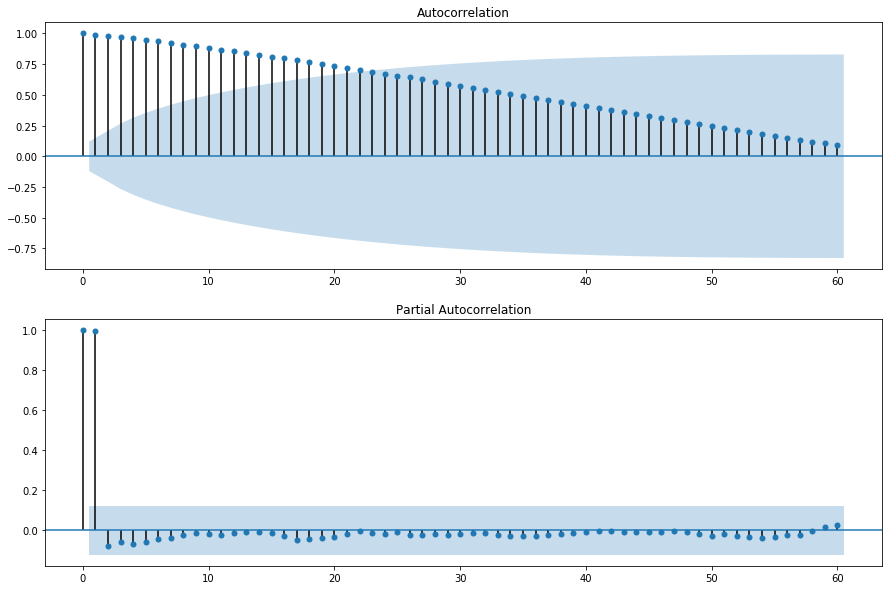

In [110]:
# This suggests that at least two levels of differencing is required. The d parameter in our
# ARIMA model should at least be a value of 2. The next step is to select the lag values for
# the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively. We can
# do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function
# (PACF) plots. The example below creates ACF and PACF plots for the series. (TEXT OF THIS APPROACH TAKEN FROM INTRO TO TIMESERIES FORECASTING w/ PYTHON
# BROWNLEE)

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

series = zip_df['1001']
plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(series, lags=60, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=60, ax=plt.gca())
plt.show()


In [125]:
# ACF shows significant lag for about 20-22 months
# PACF shows a significant lag for 2 months
# A good starting point for p and q values is 20, 2 >> this does not converge


from statsmodels.tsa.arima.model import ARIMA

# load data
series = zip_df['1001']
# prepare data
X = series.values
X = X.astype('float32')

# set trainset to include all but last 60 months (5 years)
train_size = int(len(X) - 60)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(7,2,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = RMSE(test, predictions)
print(rmse)

>Predicted=183768.513, Expected=184800.000
>Predicted=186189.249, Expected=187000.000
>Predicted=189212.764, Expected=188600.000
>Predicted=190096.867, Expected=189100.000
>Predicted=189479.643, Expected=188700.000
>Predicted=188271.599, Expected=188100.000
>Predicted=187561.946, Expected=187100.000
>Predicted=186156.530, Expected=185900.000
>Predicted=184750.228, Expected=185100.000
>Predicted=184396.494, Expected=184800.000
>Predicted=184550.653, Expected=184900.000
>Predicted=185010.334, Expected=184500.000
>Predicted=184028.019, Expected=184500.000
>Predicted=184505.170, Expected=185100.000
>Predicted=185735.701, Expected=185800.000
>Predicted=186446.998, Expected=186400.000
>Predicted=186968.813, Expected=186900.000
>Predicted=187379.042, Expected=187400.000
>Predicted=187881.308, Expected=187900.000
>Predicted=188398.861, Expected=188800.000
>Predicted=189734.123, Expected=189800.000
>Predicted=190796.787, Expected=190800.000
>Predicted=191774.959, Expected=191500.000
>Predicted=